In [1]:
# Fixing automatic autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import os
from utils import (
    read_data, 
    create_segmented_data
)

In [6]:
on_idun = False

if on_idun:
  data_path = "/cluster/projects/vc/data/mic/open/OCELOT/ocelot_data"
else: 
  data_path = "ocelot_data/"
train_data, val_data, test_data = read_data(data_path)
total_data = {}
total_data.update(train_data)
total_data.update(val_data)
total_data.update(test_data)

Skipped file number 217 as the .csv was empty.
Skipped file number 042 as the .csv was empty.
Skipped file number 053 as the .csv was empty.
Skipped file number 008 as the .csv was empty.
Skipped file number 392 as the .csv was empty.
Skipped file number 570 as the .csv was empty.
Skipped file number 558 as the .csv was empty.


In [7]:
annotation_path = os.path.join(data_path, "annotations")
create_segmented_data(data=total_data, annotation_path=annotation_path)

# Test if the data is correct
This code will test if the data that has been written to file is correct. 
The segmented data should have a red background, green cancer cells and 
blue background cells. 

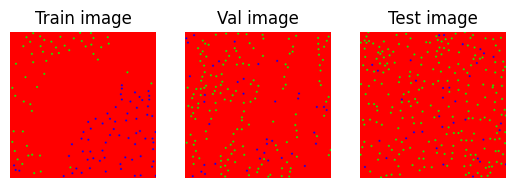

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np


from utils import get_image_tensor_from_path

# Getting the folder paths
train_path = os.path.join(annotation_path, "train/segmented_cell")
val_path = os.path.join(annotation_path, "val/segmented_cell")
test_path = os.path.join(annotation_path, "test/segmented_cell")

train_img_path = os.path.join(train_path, "288.png")
val_img_path = os.path.join(val_path, "513.png")
test_img_path = os.path.join(test_path, "550.png")

train_img = get_image_tensor_from_path(train_img_path)
train_img = np.transpose(train_img, (1, 2, 0))

val_img = get_image_tensor_from_path(val_img_path)
val_img = np.transpose(val_img, (1, 2, 0))

test_img = get_image_tensor_from_path(test_img_path)
test_img = np.transpose(test_img, (1, 2, 0))


plt.subplot(1, 3, 1)
plt.imshow(train_img*255)
plt.title("Train image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(val_img*255)
plt.title("Val image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(test_img*255)
plt.title("Test image")
plt.axis("off")


plt.show()
